<a href="https://colab.research.google.com/github/zhongyi51/COMP0016WebExample1/blob/master/Group_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Student numbers
1. 17081907
2. 17022987
3. 17031134
4. 16119797
5. 17040333 (submitting)

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import files

In [101]:
!git clone https://github.com/zhongyi51/data.git
pd.set_option('display.max_columns', 500)
df = pd.read_stata('/content/data/nsch_2018_topical.dta')

fatal: destination path 'data' already exists and is not an empty directory.


In [102]:
df.head()

,fipsst,stratum,hhid,formtype,totkids_r,tenure,hhlanguage,sc_age_years,sc_sex,k2q35a_1_years,momage,k6q41r_still,k6q42r_never,k6q43r_never,k6q13a,k6q13b,k6q14a,k6q14b,k4q32x01,k4q32x02,k4q32x03,k4q32x04,k4q32x05,dentalserv1,dentalserv2,dentalserv3,dentalserv4,dentalserv5,dentalserv6,dentalserv7,k4q28x01,k4q28x02,k4q28x03,k4q28x_ear,k4q28x04,k4q28x05,sesplanyr,sesplanmo,k4q37,spcservmo,liveusa_yr,liveusa_mo,k11q43r,a1_age,a1_liveusa,a2_age,a2_liveusa,hhcount,famcount,breathing,swallowing,stomach,physicalpain,hands,coordination,toothaches,gumbleed,cavities,memorycond,walkstairs,dressing,errandalone,k2q43b,blindness,allergies,allergies_curr,arthritis,arthritis_curr,k2q40a,k2q40b,k2q46a,k2q46b,k2q61a,k2q61b,k2q41a,k2q41b,k2q42a,k2q42b,heart,heart_curr,headache,headache_curr,k2q38a,k2q38b,k2q33a,k2q33b,k2q32a,k2q32b,downsyn,blood,blood_screen,cystfib,cystfib_screen,genetic,genetic_screen,subabuse,subabuse_curr,k2q34a,k2q34b,k2q36a,k2q36b,k2q60a,k2q60b,k2q37a,k2q37b,k2q30a,k2q30b,anyother,anyother_curr,k2q35a,k2q35b,autismmed,autismtreat,k2q31a,k2q31b,k2q31d,addtreat,k2q05,k6q40,s4q01,docprivate,overweight,k6q10,k6q12,k4q01,usualgo,usualsick,k4q31_r,k4q23,althealth,k4q27,notelig,available,appointment,transportcc,notopen,issuecost,hospitalstay,k6q15,sescurrsvc,k4q36,k4q38,k5q10,decisions,k5q21,treatchild,treatadult,medhistory,writeplan,receivecopy,healthknow,keepinsadult,k12q01_a,k12q01_b,k12q01_c,k12q01_d,k12q01_e,k12q01_f,k12q01_g,currcov,k12q03,k12q04,k12q12,tricare,k11q03r,hccovoth,k3q25,stopwork,cuthours,avoidchg,oneword,twowords,threewords,askquestion,askquestion2,tellstory,understand,directions,point,directions2,understand2,rhymeword,repeated,k7q30,k7q31,k7q32,k7q37,k7q38,bornusa,k8q35,emosupspo,emosupfam,emosuphcp,emosupwor,emosupadv,emosuppeer,emosupmhp,emosupoth,k6q20,k6q27,k9q40,k9q41,mold,k11q60,k11q61,k11q62,s9q34,k10q11,k10q12,k10q13,k10q14,k10q20,k10q22,k10q23,k9q96,ace3,ace4,ace5,ace6,ace7,ace8,ace9,ace10,a1_k11q50_r,a1_deplstat,a2_k11q50_r,a2_deplstat,k2q01,k2q01_d,k6q70_r,k6q73_r,k6q71_r,k6q72_r,k7q84_r,k7q85_r,k7q82_r,k7q83_r,k7q70_r,k5q40,k5q41,k5q42,k5q43,k5q44,discussopt,raiseconc,bestforchild,k3q20,k3q22,k3q21b,bullied_r,bully,allergies_desc,arthritis_desc,k2q40c,k2q46c,cerpals_desc,k2q41c,k2q42c,heart_desc,headache_desc,k2q38c,k2q33c,k2q32c,blood_desc,genetic_desc,k2q34c,k2q36c,k2q60c,k2q37c,k2q30c,anyother_desc,k2q35c,k2q31c,recogbegin,clearexp,writename,recshapes,distracted,worktofin,simpleinst,playwell,newactivity,hurtsad,calmdown,temper,sitstill,recogabc,talkabout,wktosolve,strengths,hopeful,a1_physhealth,a1_menthealth,a2_physhealth,a2_menthealth,k10q30,k10q31,k10q40_r,goforhelp,k10q41_r,k8q31,k8q32,k8q34,a1_relation,a1_sex,a1_born,a1_grade,a1_marital,a2_relation,a2_sex,a2_born,a2_grade,a2_marital,a1_active,a2_active,howmuch,athomehc,arrangehc,k7q02r_r,k7q04r_r,physactiv,hoursleep05,hoursleep,screentime,k6q60_r,k6q61_r,k8q11,foodsit,pesticide,poschoice,gainskills,changeage,k2q35d,hcability,hcextent,k4q20r,docroom,wgtconc,k4q02_r,dentistvisit,k4q22_r,treatneed,k4q24_r,k4q26,c4q04,hospitaler,k4q04_r,k5q11,k5q20_r,k5q22,k5q30,k5q32,k5q31_r,k8q21,k8q30,countto,k7q33,bedtime,k3q04_r,k6q08_r,confident,ace1,usepencil,makefriend,sleeppos,color,k4q30_r,startschool,menbevcov,planneeds_r,year,cbsafp_yn,metro_yn,mpc_yn,totage_0_5,totage_6_11,totage_12_17,totcshcn,totnonshcn,sc_race_r,sc_hispanic_r,sc_cshcn,sc_k2q10,sc_k2q11,sc_k2q12,sc_k2q13,sc_k2q14,sc_k2q15,sc_k2q16,sc_k2q17,sc_k2q18,sc_k2q19,sc_k2q20,sc_k2q21,sc_k2q22,sc_k2q23,sc_age_lt4,sc_age_lt6,sc_age_lt9,sc_age_lt10,agepos4,tenure_if,totmale,totfemale,sc_race_r_if,sc_racer,sc_raceasia,sc_raceaian,sc_hispanic_r_if,sc_sex_if,a2_if,birthwt_oz_s,breastfedend_day_s,breastfedend_wk_s,breastfedend_mo_s,frstformula_day_s,frstformula_wk_s,frstformula_mo_s,frstsolids_day_s,frstsolids_wk_s,frstsolids_mo_s,house_gen,family_r,currins,insgap,instype,higrade,higrade_tvis,birthwt_vl,birthwt_l,birthwt,fpl_if,a1_grade_if,bmiclass,hhcount_if,fpl_i1,fpl_i2,fpl_i3,fpl_i4,fpl_i5,fp

In [0]:
features = ['ace1','ace3','ace4','ace5','ace6','ace7','ace8','ace9','ace10','a1_deplstat','a1_active','a1_grade','a1_menthealth','a1_physhealth','a1_relation','a2_deplstat','a2_active','a2_grade','a2_menthealth','a2_physhealth','a2_relation','foodsit','k8q35','emosupadv','emosupfam','emosuphcp','emosupmhp','emosupoth','emosuppeer','emosupspo','emosupwor','sc_race_r','sc_age_years','sc_sex']

In [0]:
targets = ['k2q31a','k2q32a','k2q33a']

# Predictor Variables 

### Summary

In [105]:
df[features].describe()

,ace1,ace3,ace4,ace5,ace6,ace7,ace8,ace9,ace10,a1_deplstat,a1_active,a1_grade,a1_menthealth,a1_physhealth,a1_relation,a2_deplstat,a2_active,a2_grade,a2_menthealth,a2_physhealth,a2_relation,foodsit,k8q35,emosupadv,emosupfam,emosuphcp,emosupmhp,emosupoth,emosuppeer,emosupspo,emosupwor,sc_race_r,sc_age_years,sc_sex
count,30008.000000,29754.000000,29714.000000,29652.000000,29654.000000,29659.000000,29603.000000,29663.000000,29717.000000,1488.000000,29881.000000,30530.000000,29847.000000,29879.000000,29956.000000,1711.000000,25298.000000,25330.000000,25300.000000,25269.000000,29737.000000,30011.000000,30148.000000,24428.00000,24428.000000,24428.000000,24428.000000,24428.000000,24428.000000,24428.000000,24428.000000,30530.000000,30530.000000,30530.000000
mean,1.604139,1.768636,1.969846,1.932821,1.947798,1.962709,1.912441,1.902640,1.966719,1.782258,1.151401,6.040321,1.901129,2.096723,1.208038,1.772648,1.204759,5.688077,1.845771,1.992916,2.235531,1.311786,1.179912,1.96021,1.102997,1.699648,1.895325,1.978549,1.872892,1.141231,1.695022,1.834261,9.471962,1.476679
std,0.772407,0.421712,0.171014,0.250336,0.222438,0.189476,0.282657,0.296453,0.179371,0.412850,0.633224,1.913893,0.864839,0.883851,0.769505,0.419245,0.723434,2.062761,0.846778,0.857223,2.515571,0.557629,0.384121,0.19547,0.303961,0.458420,0.306140,0.144884,0.333101,0.348267,0.460407,1.817290,5.218582,0.499464
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,5.000000,1.000000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.00000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,5.000000,1.000000
50%,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,7.000000,2.000000,2.000000,1.000000,2.000000,1.000000,6.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.00000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,10.000000,1.000000
75%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,7.000000,2.000000,3.000000,1.000000,2.000000,1.000000,7.000000,2.000000,3.000000,1.000000,2.000000,1.000000,2.00000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,14.000000,2.000000
max,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,4.000000,9.000000,5.000000,5.000000,7.000000,2.000000,4.000000,9.000000,5.000000,5.000000,8.000000,4.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,7.000000,17.000000,2.000000


In [106]:
df[features].skew()
print("The value of Skewness is:")
print(df[features].skew())
df[features].kurtosis()
print("The value of kurtosis is:")
print(df[features].kurtosis())

The value of Skewness is:
ace1             1.133372
ace3            -1.274114
ace4            -5.495188
ace5            -3.458145
ace6            -4.026543
ace7            -4.884425
ace8            -2.918516
ace9            -2.716566
ace10           -5.204295
a1_deplstat     -1.369205
a1_active        4.109373
a1_grade        -0.573969
a1_menthealth    0.730868
a1_physhealth    0.579513
a1_relation      4.691466
a2_deplstat     -1.302183
a2_active        3.417361
a2_grade        -0.359415
a2_menthealth    0.812921
a2_physhealth    0.628798
a2_relation      1.740062
foodsit          1.801379
k8q35            1.666709
emosupadv       -4.709124
emosupfam        2.612417
emosuphcp       -0.871097
emosupmhp       -2.582850
emosupoth       -6.606482
emosuppeer      -2.239094
emosupspo        2.060475
emosupwor       -0.847241
sc_race_r        2.096081
sc_age_years    -0.193609
sc_sex           0.093392
dtype: float64
The value of kurtosis is:
ace1              0.624284
ace3             -0.37

### Bar charts for predictor variables

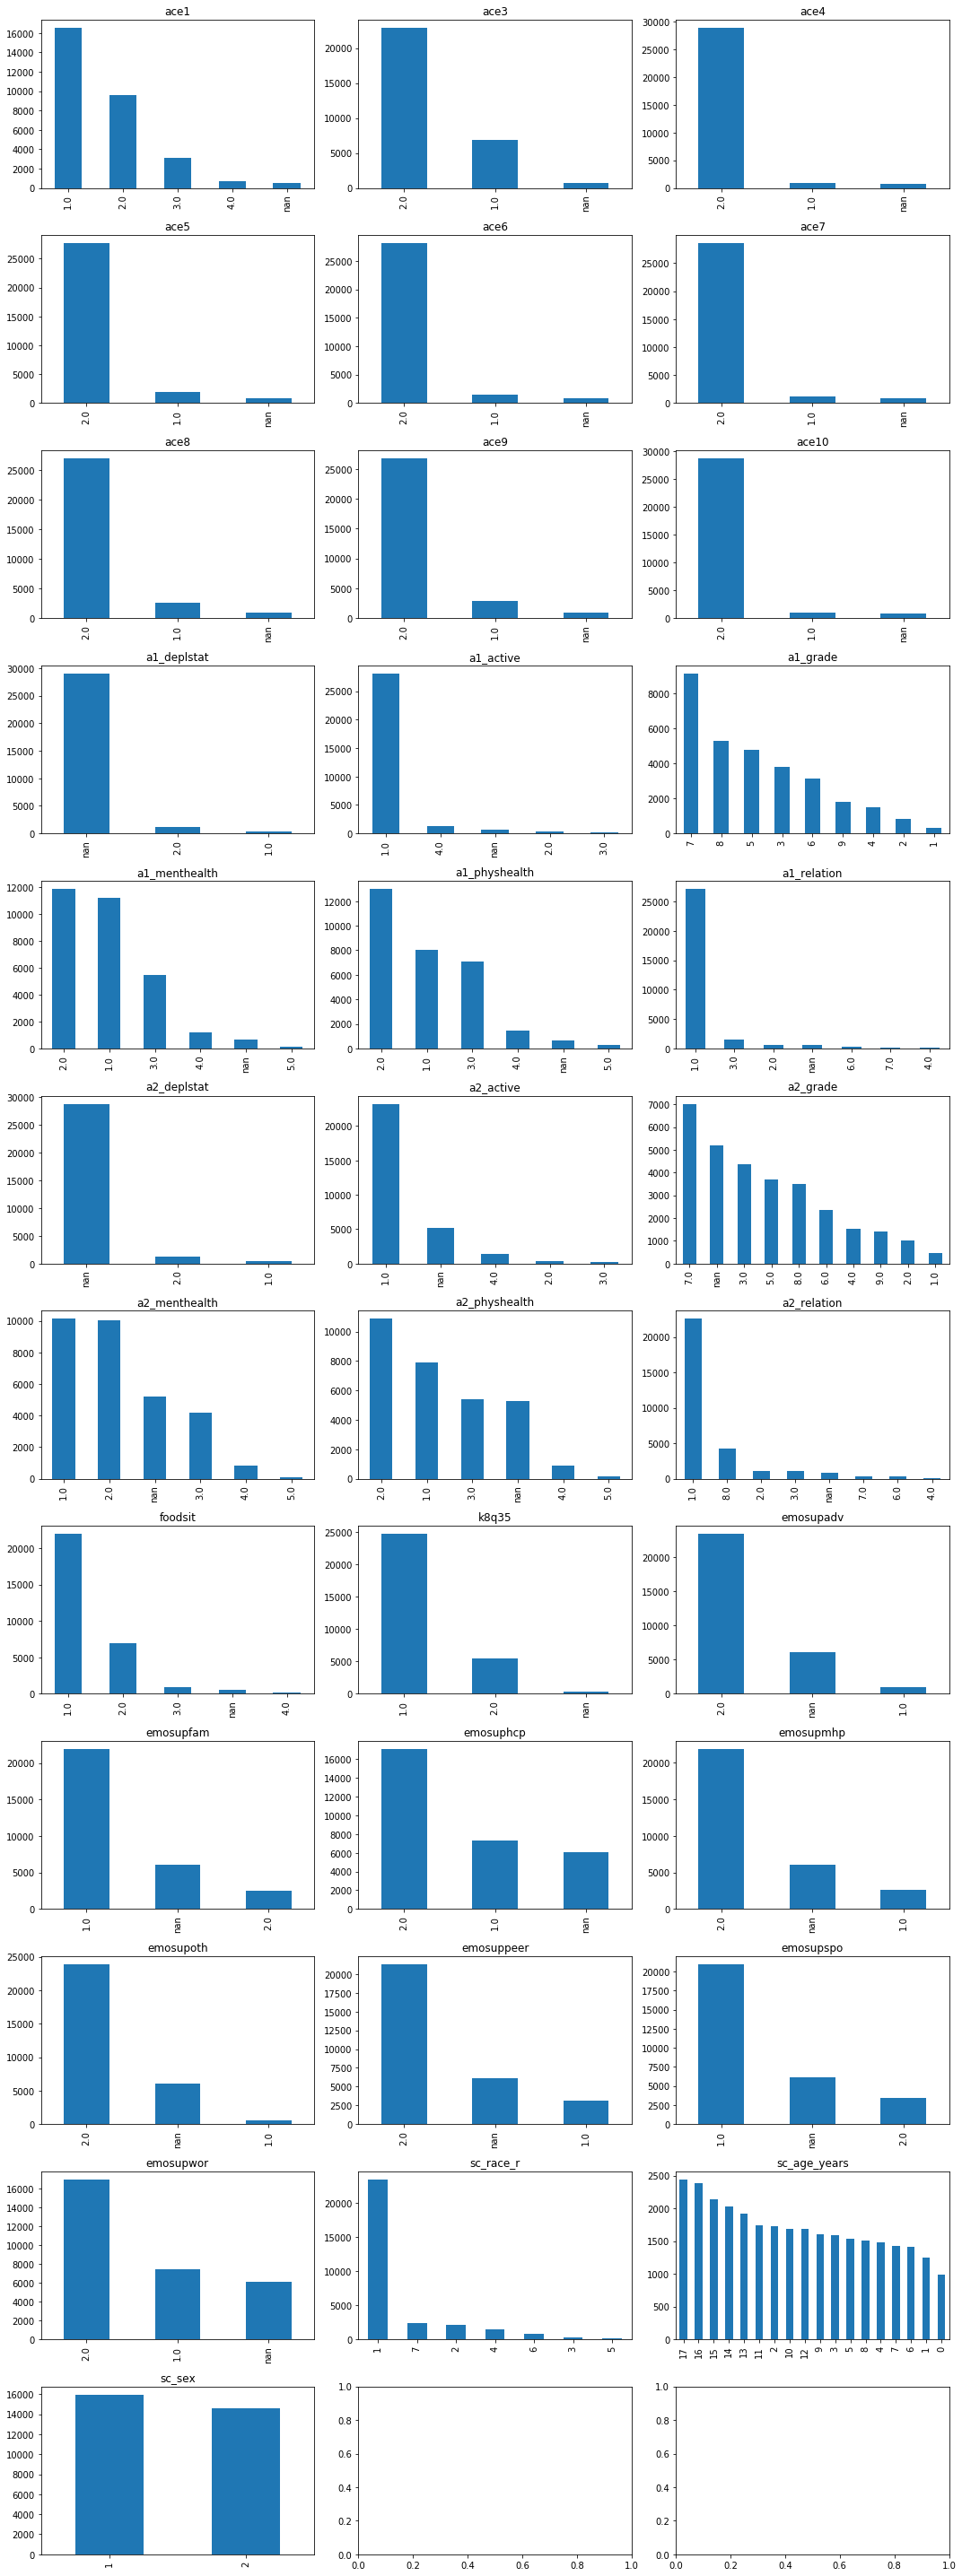

In [107]:
fig, axes = plt.subplots(12, 3, figsize=(15, 40))
for i in range(len(features)):
    a = i%3
    b = i//3
    df[features[i]].value_counts(dropna = False).plot(kind = 'bar', ax=axes[b][a], title = features[i])
fig.tight_layout()

In [0]:
def autolabel(rects):
    df_plot
    for idx,rect in enumerate(bar_plot):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,
                str(df_plot.counts[idx]) + " - " + str("{0:.1f}".format(df_plot.counts[idx]/df_plot.counts.sum()*100)) + "%",
                ha='center', va='bottom', rotation=0)

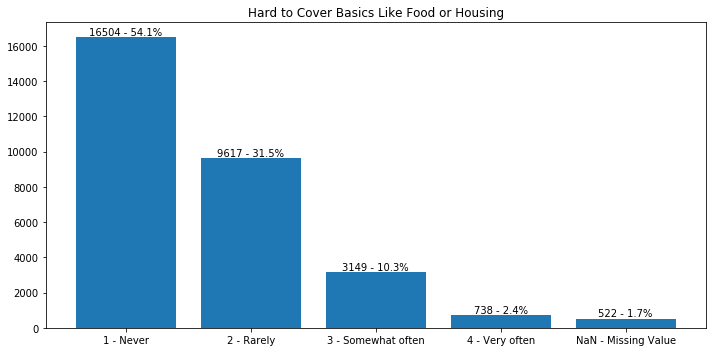

In [109]:
df_plot = df.ace1.value_counts(dropna=False).rename_axis('unique_values').reset_index(name='counts')
ace1_dict = {1 :'1 - Never', 2 : '2 - Rarely', 3 : '3 - Somewhat often', 4 : '4 - Very often', np.nan: 'NaN - Missing Value'}
fig, ax = plt.subplots(figsize=(len(df_plot.index)*2, 5))
df_plot = df_plot.replace({"unique_values": ace1_dict})
bar_plot = plt.bar(df_plot.unique_values, df_plot.counts)
plt.title('Hard to Cover Basics Like Food or Housing')
autolabel(bar_plot)
plt.tight_layout()

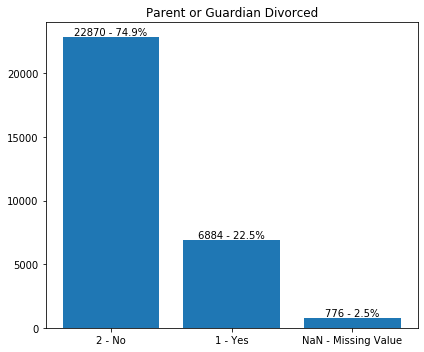

In [110]:
df_plot = df.ace3.value_counts(dropna=False).rename_axis('unique_values').reset_index(name='counts')
ace3_dict = {1 :'1 - Yes', 2 : '2 - No', np.nan: 'NaN - Missing Value'}
fig, ax = plt.subplots(figsize=(len(df_plot.index)*2, 5))
df_plot = df_plot.replace({"unique_values": ace3_dict})
bar_plot = plt.bar(df_plot.unique_values, df_plot.counts)
plt.title('Parent or Guardian Divorced')
autolabel(bar_plot)
plt.tight_layout()

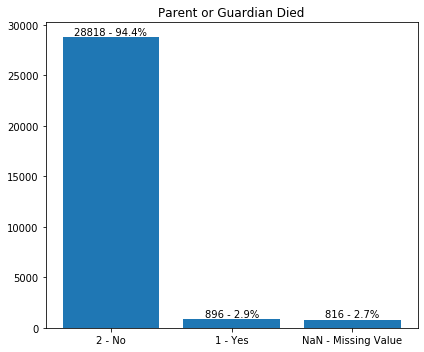

In [111]:
df_plot = df.ace4.value_counts(dropna=False).rename_axis('unique_values').reset_index(name='counts')
ace4_dict = {1 :'1 - Yes', 2 : '2 - No', np.nan: 'NaN - Missing Value'}
fig, ax = plt.subplots(figsize=(len(df_plot.index)*2, 5))
df_plot = df_plot.replace({"unique_values": ace4_dict})
bar_plot = plt.bar(df_plot.unique_values, df_plot.counts)
plt.title('Parent or Guardian Died')
autolabel(bar_plot)
plt.tight_layout()

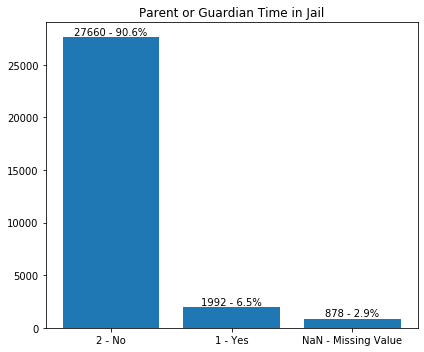

In [112]:
df_plot = df.ace5.value_counts(dropna=False).rename_axis('unique_values').reset_index(name='counts')
ace5_dict = {1 :'1 - Yes', 2 : '2 - No', np.nan: 'NaN - Missing Value'}
fig, ax = plt.subplots(figsize=(len(df_plot.index)*2, 5))
df_plot = df_plot.replace({"unique_values": ace5_dict})
bar_plot = plt.bar(df_plot.unique_values, df_plot.counts)
plt.title('Parent or Guardian Time in Jail')
autolabel(bar_plot)
plt.tight_layout()

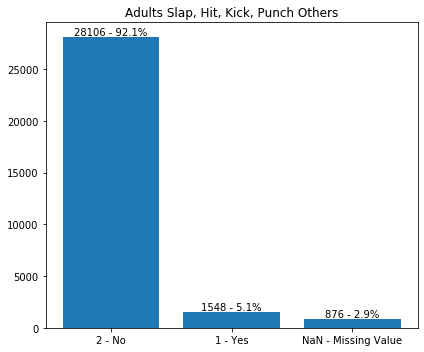

In [113]:
df_plot = df.ace6.value_counts(dropna=False).rename_axis('unique_values').reset_index(name='counts')
ace6_dict = {1 :'1 - Yes', 2 : '2 - No', np.nan: 'NaN - Missing Value'}
fig, ax = plt.subplots(figsize=(len(df_plot.index)*2, 5))
df_plot = df_plot.replace({"unique_values": ace6_dict})
bar_plot = plt.bar(df_plot.unique_values, df_plot.counts)
plt.title('Adults Slap, Hit, Kick, Punch Others')
autolabel(bar_plot)
plt.tight_layout()

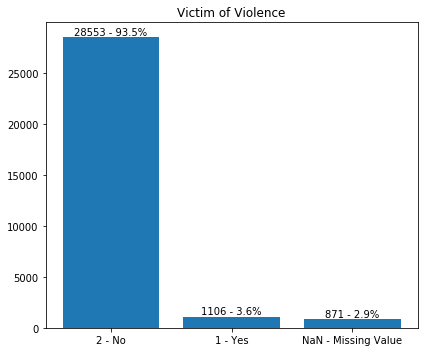

In [114]:
df_plot = df.ace7.value_counts(dropna=False).rename_axis('unique_values').reset_index(name='counts')
ace7_dict = {1 :'1 - Yes', 2 : '2 - No', np.nan: 'NaN - Missing Value'}
fig, ax = plt.subplots(figsize=(len(df_plot.index)*2, 5))
df_plot = df_plot.replace({"unique_values": ace7_dict})
bar_plot = plt.bar(df_plot.unique_values, df_plot.counts)
plt.title('Victim of Violence')
autolabel(bar_plot)
plt.tight_layout()

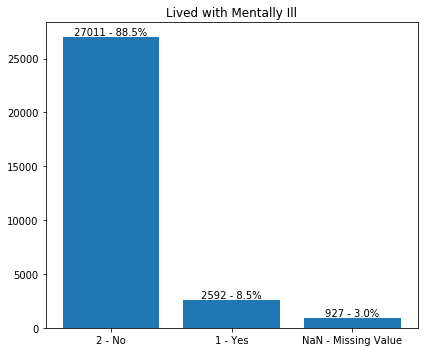

In [115]:
df_plot = df.ace8.value_counts(dropna=False).rename_axis('unique_values').reset_index(name='counts')
ace8_dict = {1 :'1 - Yes', 2 : '2 - No', np.nan: 'NaN - Missing Value'}
fig, ax = plt.subplots(figsize=(len(df_plot.index)*2, 5))
df_plot = df_plot.replace({"unique_values": ace8_dict})
bar_plot = plt.bar(df_plot.unique_values, df_plot.counts)
plt.title('Lived with Mentally Ill')
autolabel(bar_plot)
plt.tight_layout()

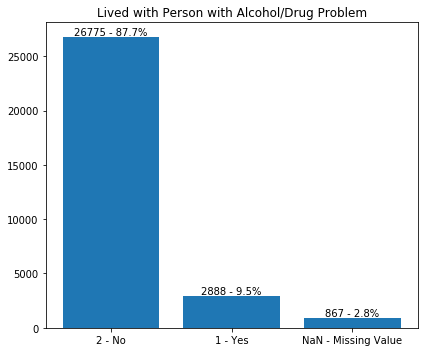

In [116]:
df_plot = df.ace9.value_counts(dropna=False).rename_axis('unique_values').reset_index(name='counts')
ace9_dict = {1 :'1 - Yes', 2 : '2 - No', np.nan: 'NaN - Missing Value'}
fig, ax = plt.subplots(figsize=(len(df_plot.index)*2, 5))
df_plot = df_plot.replace({"unique_values": ace9_dict})
bar_plot = plt.bar(df_plot.unique_values, df_plot.counts)
plt.title('Lived with Person with Alcohol/Drug Problem')
autolabel(bar_plot)
plt.tight_layout()

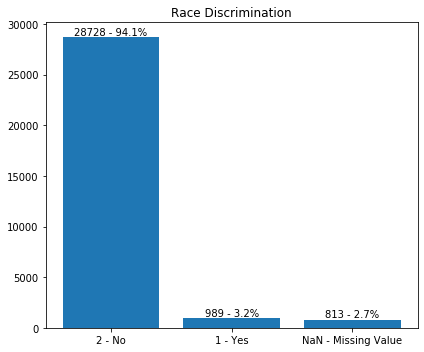

In [117]:
df_plot = df.ace10.value_counts(dropna=False).rename_axis('unique_values').reset_index(name='counts')
ace10_dict = {1 :'1 - Yes', 2 : '2 - No', np.nan: 'NaN - Missing Value'}
fig, ax = plt.subplots(figsize=(len(df_plot.index)*2, 5))
df_plot = df_plot.replace({"unique_values": ace10_dict})
bar_plot = plt.bar(df_plot.unique_values, df_plot.counts)
plt.title('Race Discrimination')
autolabel(bar_plot)
plt.tight_layout()

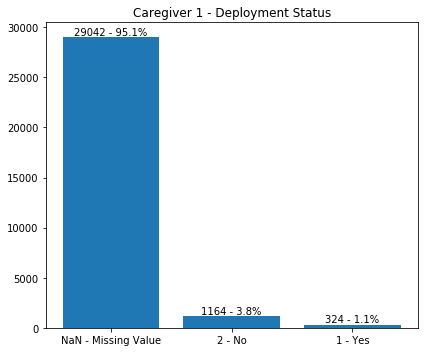

In [118]:
df_plot = df.a1_deplstat.value_counts(dropna=False).rename_axis('unique_values').reset_index(name='counts')
a1_deplstat_dict = {1 :'1 - Yes', 2 : '2 - No', np.nan: 'NaN - Missing Value'}
fig, ax = plt.subplots(figsize=(len(df_plot.index)*2, 5))
df_plot = df_plot.replace({"unique_values": a1_deplstat_dict})
bar_plot = plt.bar(df_plot.unique_values, df_plot.counts)
plt.title('Caregiver 1 ‐ Deployment Status')
autolabel(bar_plot)
plt.tight_layout()

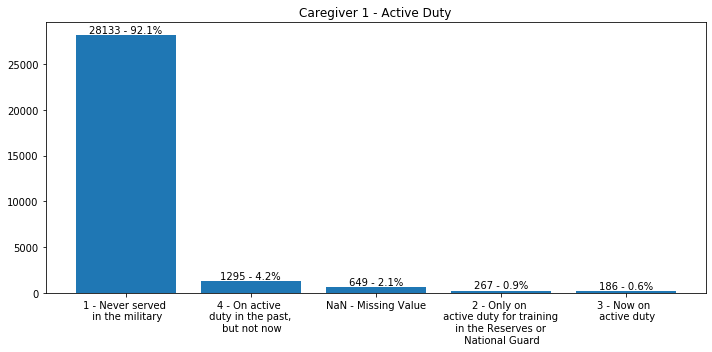

In [119]:
df_plot = df.a1_active.value_counts(dropna=False).rename_axis('unique_values').reset_index(name='counts')
a1_active_dict = {1 :'1 - Never served \n in the military', 2 : '2 - Only on \n active duty for training \n in the Reserves or \n National Guard', 3 : '3 - Now on \n active duty', 4 : '4 - On active \n duty in the past, \n but not now', np.nan: 'NaN - Missing Value'}
fig, ax = plt.subplots(figsize=(len(df_plot.index)*2, 5))
df_plot = df_plot.replace({"unique_values": a1_active_dict})
bar_plot = plt.bar(df_plot.unique_values, df_plot.counts)
plt.title('Caregiver 1 ‐ Active Duty')
autolabel(bar_plot)
plt.tight_layout()

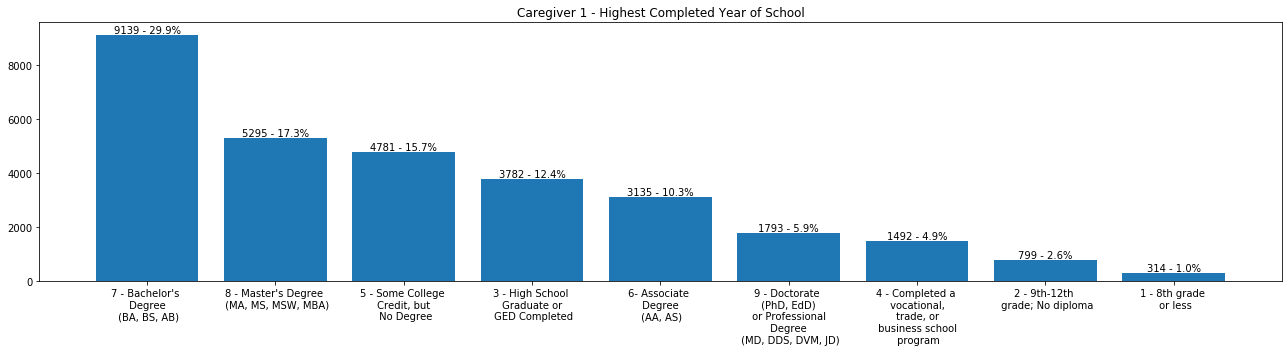

In [120]:
df_plot = df.a1_grade.value_counts(dropna=False).rename_axis('unique_values').reset_index(name='counts')
a1_grade_dict = {1 :'1 - 8th grade \n or less', 2 : '2 - 9th‐12th \n grade; No diploma',3 :'3 - High School \n Graduate or \n GED Completed', 4 : '4 - Completed a \n vocational, \n trade, or \n business school \n program',5 :'5 - Some College \n Credit, but \n No Degree', 6 : '6- Associate \n Degree \n (AA, AS)',7 :'7 - Bachelor\'s \n Degree \n (BA, BS, AB)', 8 : '8 - Master\'s Degree \n (MA, MS, MSW, MBA)',9 :'9 - Doctorate \n (PhD, EdD) \n or Professional \n Degree \n (MD, DDS, DVM, JD)', np.nan: 'NaN - Missing Value'}
fig, ax = plt.subplots(figsize=(len(df_plot.index)*2, 5))
df_plot = df_plot.replace({"unique_values": a1_grade_dict})
bar_plot = plt.bar(df_plot.unique_values, df_plot.counts)
plt.title('Caregiver 1 ‐ Highest Completed Year of School')
autolabel(bar_plot)
plt.tight_layout()

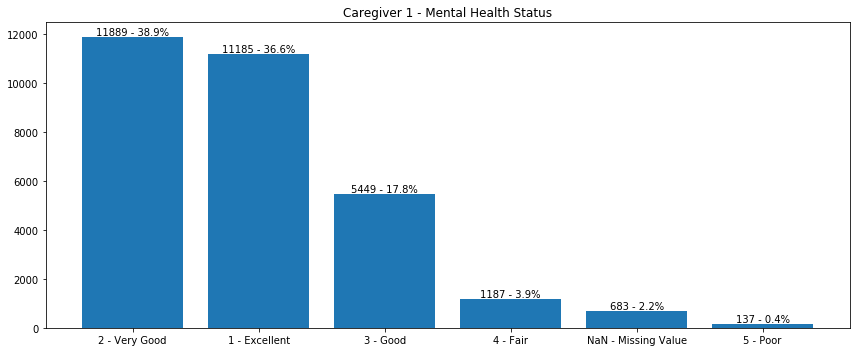

In [121]:
df_plot = df.a1_menthealth.value_counts(dropna=False).rename_axis('unique_values').reset_index(name='counts')
a1_menthealth_dict = {1 :'1 - Excellent', 2 : '2 - Very Good', 3 : '3 - Good', 4 : '4 - Fair', 5 : '5 - Poor', np.nan: 'NaN - Missing Value'}
fig, ax = plt.subplots(figsize=(len(df_plot.index)*2, 5))
df_plot = df_plot.replace({"unique_values": a1_menthealth_dict})
bar_plot = plt.bar(df_plot.unique_values, df_plot.counts)
plt.title('Caregiver 1 ‐ Mental Health Status')
autolabel(bar_plot)
plt.tight_layout()

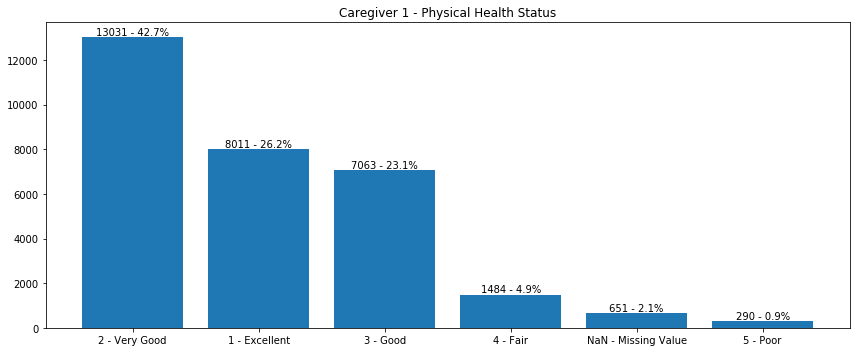

In [122]:
df_plot = df.a1_physhealth.value_counts(dropna=False).rename_axis('unique_values').reset_index(name='counts')
a1_physhealth_dict = {1 :'1 - Excellent', 2 : '2 - Very Good', 3 : '3 - Good', 4 : '4 - Fair', 5 : '5 - Poor', np.nan: 'NaN - Missing Value'}
fig, ax = plt.subplots(figsize=(len(df_plot.index)*2, 5))
df_plot = df_plot.replace({"unique_values": a1_physhealth_dict})
bar_plot = plt.bar(df_plot.unique_values, df_plot.counts)
plt.title('Caregiver 1 ‐ Physical Health Status')
autolabel(bar_plot)
plt.tight_layout()

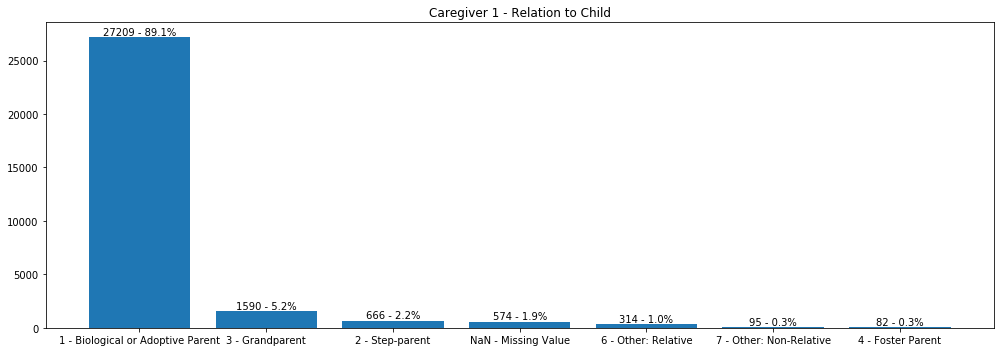

In [123]:
df_plot = df.a1_relation.value_counts(dropna=False).rename_axis('unique_values').reset_index(name='counts')
a1_relation_dict = {1 :'1 - Biological or Adoptive Parent', 2 : '2 - Step‐parent',3 :'3 - Grandparent', 4 : '4 - Foster Parent', 6 : '6 - Other: Relative',7 :'7 - Other: Non‐Relative', np.nan: 'NaN - Missing Value'}
fig, ax = plt.subplots(figsize=(len(df_plot.index)*2, 5))
df_plot = df_plot.replace({"unique_values": a1_relation_dict})
bar_plot = plt.bar(df_plot.unique_values, df_plot.counts)
plt.title('Caregiver 1 ‐ Relation to Child')
autolabel(bar_plot)
plt.tight_layout()

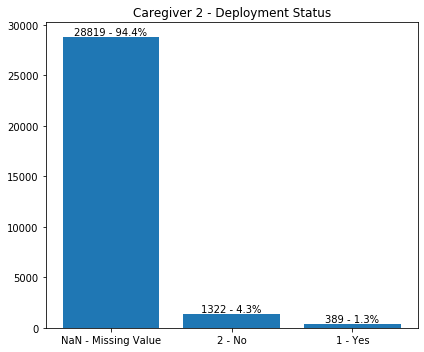

In [124]:
df_plot = df.a2_deplstat.value_counts(dropna=False).rename_axis('unique_values').reset_index(name='counts')
a2_deplstat_dict = {1 :'1 - Yes', 2 : '2 - No', np.nan: 'NaN - Missing Value'}
fig, ax = plt.subplots(figsize=(len(df_plot.index)*2, 5))
df_plot = df_plot.replace({"unique_values": a2_deplstat_dict})
bar_plot = plt.bar(df_plot.unique_values, df_plot.counts)
plt.title('Caregiver 2 ‐ Deployment Status')
autolabel(bar_plot)
plt.tight_layout()

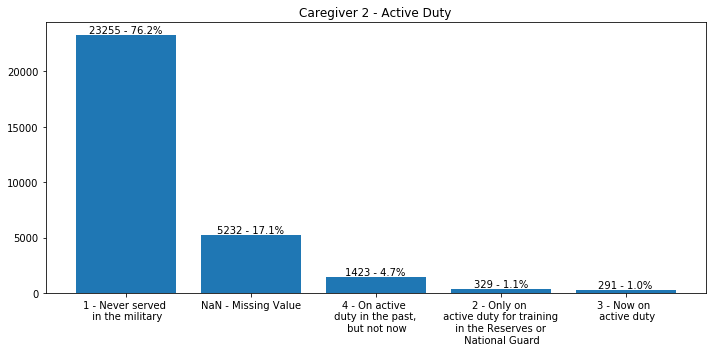

In [125]:
df_plot = df.a2_active.value_counts(dropna=False).rename_axis('unique_values').reset_index(name='counts')
a2_active_dict = {1 :'1 - Never served \n in the military', 2 : '2 - Only on \n active duty for training \n in the Reserves or \n National Guard', 3 : '3 - Now on \n active duty', 4 : '4 - On active \n duty in the past, \n but not now', np.nan: 'NaN - Missing Value'}
fig, ax = plt.subplots(figsize=(len(df_plot.index)*2, 5))
df_plot = df_plot.replace({"unique_values": a2_active_dict})
bar_plot = plt.bar(df_plot.unique_values, df_plot.counts)
plt.title('Caregiver 2 ‐ Active Duty')
autolabel(bar_plot)
plt.tight_layout()

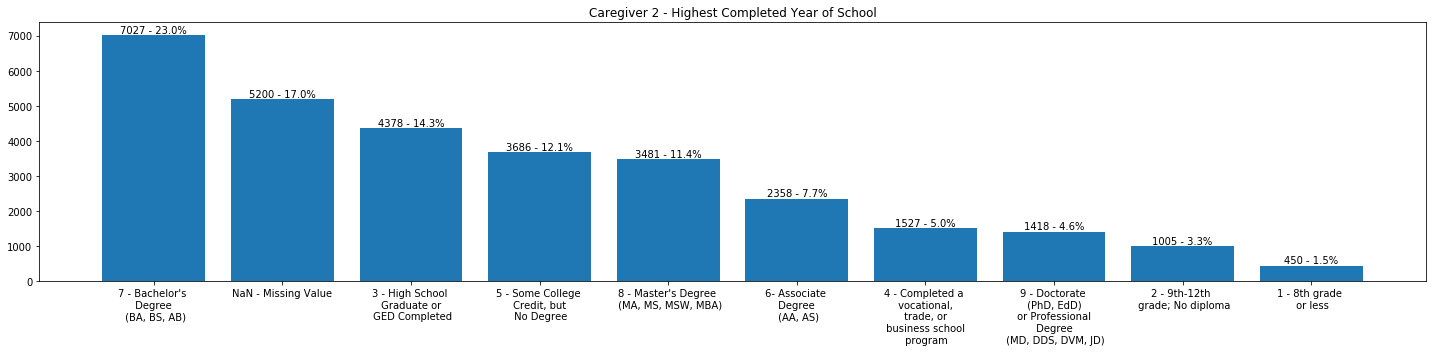

In [126]:
df_plot = df.a2_grade.value_counts(dropna=False).rename_axis('unique_values').reset_index(name='counts')
a2_grade_dict = {1 :'1 - 8th grade \n or less', 2 : '2 - 9th‐12th \n grade; No diploma',3 :'3 - High School \n Graduate or \n GED Completed', 4 : '4 - Completed a \n vocational, \n trade, or \n business school \n program',5 :'5 - Some College \n Credit, but \n No Degree', 6 : '6- Associate \n Degree \n (AA, AS)',7 :'7 - Bachelor\'s \n Degree \n (BA, BS, AB)', 8 : '8 - Master\'s Degree \n (MA, MS, MSW, MBA)',9 :'9 - Doctorate \n (PhD, EdD) \n or Professional \n Degree \n (MD, DDS, DVM, JD)', np.nan: 'NaN - Missing Value'}
fig, ax = plt.subplots(figsize=(len(df_plot.index)*2, 5))
df_plot = df_plot.replace({"unique_values": a2_grade_dict})
bar_plot = plt.bar(df_plot.unique_values, df_plot.counts)
plt.title('Caregiver 2 ‐ Highest Completed Year of School')
autolabel(bar_plot)
plt.tight_layout()

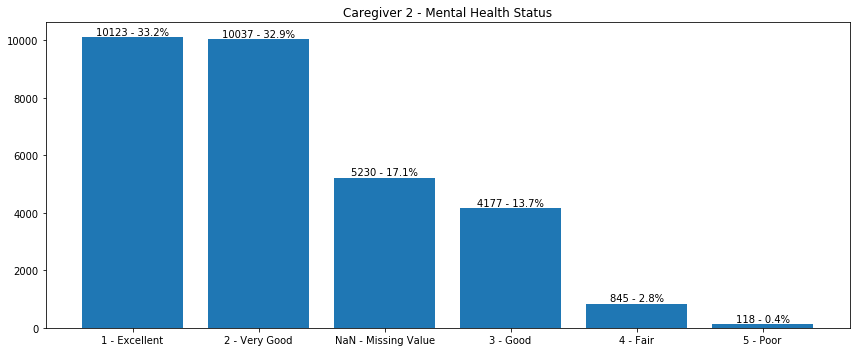

In [127]:
df_plot = df.a2_menthealth.value_counts(dropna=False).rename_axis('unique_values').reset_index(name='counts')
a2_menthealth_dict = {1 :'1 - Excellent', 2 : '2 - Very Good', 3 : '3 - Good', 4 : '4 - Fair', 5 : '5 - Poor', np.nan: 'NaN - Missing Value'}
fig, ax = plt.subplots(figsize=(len(df_plot.index)*2, 5))
df_plot = df_plot.replace({"unique_values": a2_menthealth_dict})
bar_plot = plt.bar(df_plot.unique_values, df_plot.counts)
plt.title('Caregiver 2 ‐ Mental Health Status')
autolabel(bar_plot)
plt.tight_layout()

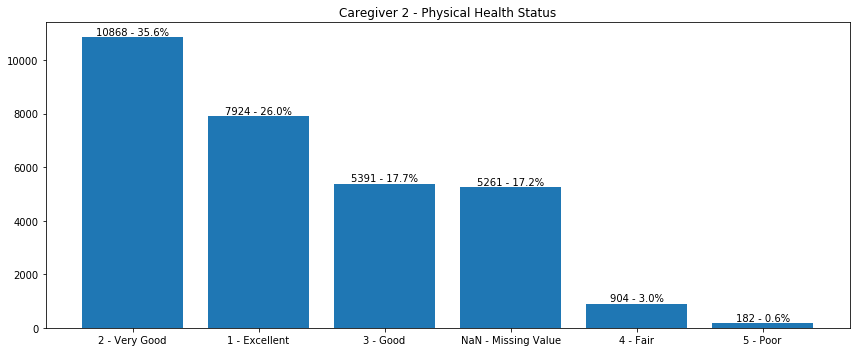

In [128]:
df_plot = df.a2_physhealth.value_counts(dropna=False).rename_axis('unique_values').reset_index(name='counts')
a2_physhealth_dict = {1 :'1 - Excellent', 2 : '2 - Very Good', 3 : '3 - Good', 4 : '4 - Fair', 5 : '5 - Poor', np.nan: 'NaN - Missing Value'}
fig, ax = plt.subplots(figsize=(len(df_plot.index)*2, 5))
df_plot = df_plot.replace({"unique_values": a2_physhealth_dict})
bar_plot = plt.bar(df_plot.unique_values, df_plot.counts)
plt.title('Caregiver 2 ‐ Physical Health Status')
autolabel(bar_plot)
plt.tight_layout()

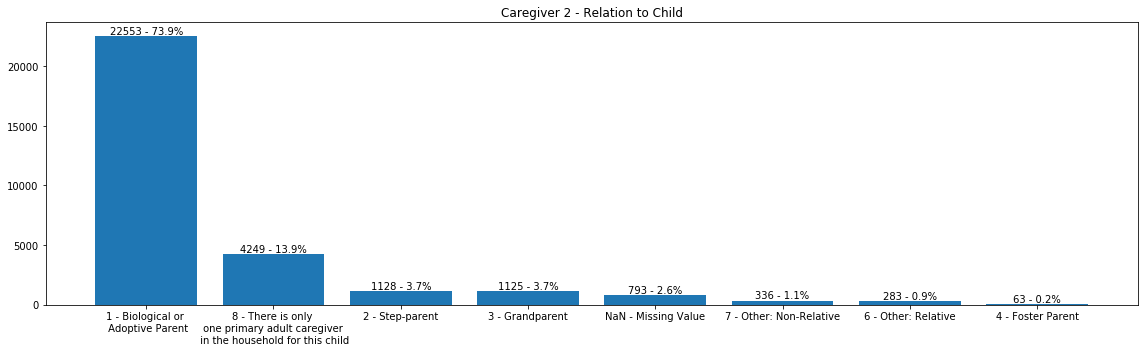

In [129]:
df_plot = df.a2_relation.value_counts(dropna=False).rename_axis('unique_values').reset_index(name='counts')
a2_relation_dict = {1 :'1 - Biological or \n Adoptive Parent', 2 : '2 - Step‐parent',3 :'3 - Grandparent', 4 : '4 - Foster Parent', 6 : '6 - Other: Relative',7 :'7 - Other: Non‐Relative', 8 :'8 - There is only \n one primary adult caregiver \n in the household for this child',np.nan: 'NaN - Missing Value'}
fig, ax = plt.subplots(figsize=(len(df_plot.index)*2, 5))
df_plot = df_plot.replace({"unique_values": a2_relation_dict})
bar_plot = plt.bar(df_plot.unique_values, df_plot.counts)
plt.title('Caregiver 2 ‐ Relation to Child')
autolabel(bar_plot)
plt.tight_layout()

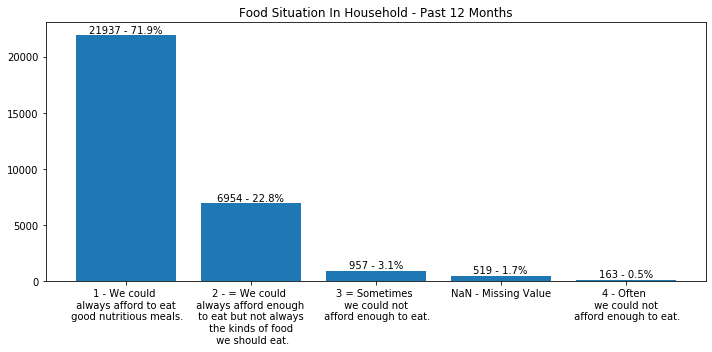

In [130]:
df_plot = df.foodsit.value_counts(dropna=False).rename_axis('unique_values').reset_index(name='counts')
foodsit_dict = {1 :'1 - We could \n always afford to eat \n good nutritious meals.', 2 : '2 - = We could \n always afford enough \n to eat but not always \n the kinds of food \n we should eat.',3 :'3 = Sometimes \n we could not \n afford enough to eat.', 4 : '4 - Often \n we could not \n afford enough to eat.',np.nan: 'NaN - Missing Value'}
fig, ax = plt.subplots(figsize=(len(df_plot.index)*2, 5))
df_plot = df_plot.replace({"unique_values": foodsit_dict})
bar_plot = plt.bar(df_plot.unique_values, df_plot.counts)
plt.title('Food Situation In Household ‐ Past 12 Months')
autolabel(bar_plot)
plt.tight_layout()

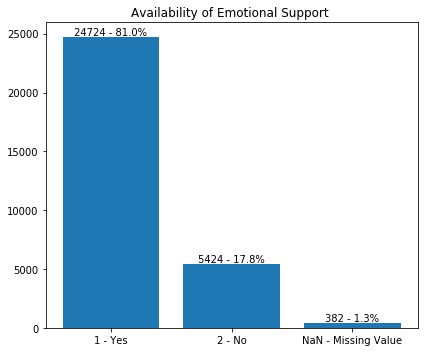

In [131]:
df_plot = df.k8q35.value_counts(dropna=False).rename_axis('unique_values').reset_index(name='counts')
k8q35_dict = {1 :'1 - Yes', 2 : '2 - No', np.nan: 'NaN - Missing Value'}
fig, ax = plt.subplots(figsize=(len(df_plot.index)*2, 5))
df_plot = df_plot.replace({"unique_values": k8q35_dict})
bar_plot = plt.bar(df_plot.unique_values, df_plot.counts)
plt.title('Availability of Emotional Support ')
autolabel(bar_plot)
plt.tight_layout()

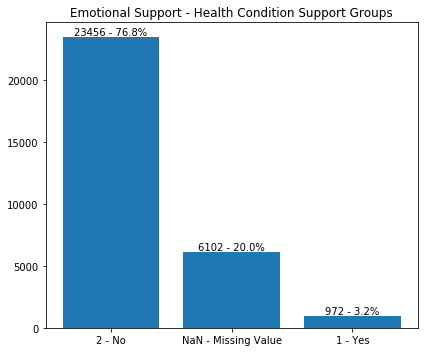

In [132]:
df_plot = df.emosupadv.value_counts(dropna=False).rename_axis('unique_values').reset_index(name='counts')
emosupadv_dict = {1 :'1 - Yes', 2 : '2 - No', np.nan: 'NaN - Missing Value'}
fig, ax = plt.subplots(figsize=(len(df_plot.index)*2, 5))
df_plot = df_plot.replace({"unique_values": emosupadv_dict})
bar_plot = plt.bar(df_plot.unique_values, df_plot.counts)
plt.title('Emotional Support ‐ Health Condition Support Groups')
autolabel(bar_plot)
plt.tight_layout()

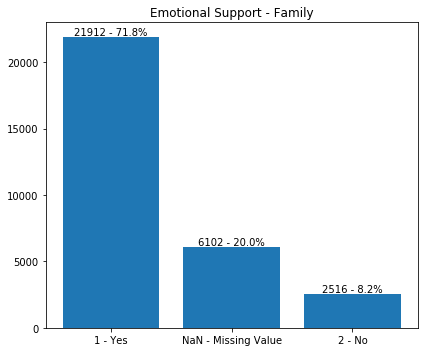

In [133]:
df_plot = df.emosupfam.value_counts(dropna=False).rename_axis('unique_values').reset_index(name='counts')
emosupfam_dict = {1 :'1 - Yes', 2 : '2 - No', np.nan: 'NaN - Missing Value'}
fig, ax = plt.subplots(figsize=(len(df_plot.index)*2, 5))
df_plot = df_plot.replace({"unique_values": emosupfam_dict})
bar_plot = plt.bar(df_plot.unique_values, df_plot.counts)
plt.title('Emotional Support ‐ Family')
autolabel(bar_plot)
plt.tight_layout()

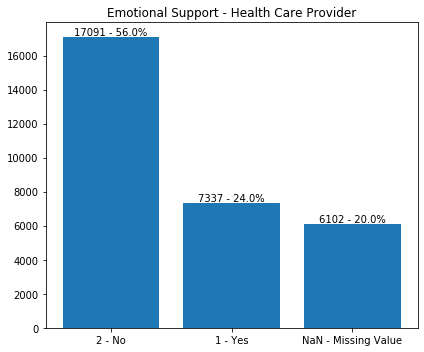

In [134]:
df_plot = df.emosuphcp.value_counts(dropna=False).rename_axis('unique_values').reset_index(name='counts')
emosuphcp_dict = {1 :'1 - Yes', 2 : '2 - No', np.nan: 'NaN - Missing Value'}
fig, ax = plt.subplots(figsize=(len(df_plot.index)*2, 5))
df_plot = df_plot.replace({"unique_values": emosuphcp_dict})
bar_plot = plt.bar(df_plot.unique_values, df_plot.counts)
plt.title('Emotional Support ‐ Health Care Provider')
autolabel(bar_plot)
plt.tight_layout()

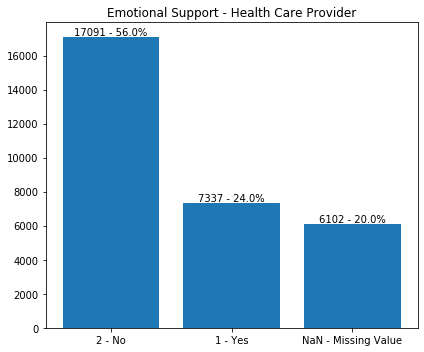

In [135]:
df_plot = df.emosuphcp.value_counts(dropna=False).rename_axis('unique_values').reset_index(name='counts')
emosuphcp_dict = {1 :'1 - Yes', 2 : '2 - No', np.nan: 'NaN - Missing Value'}
fig, ax = plt.subplots(figsize=(len(df_plot.index)*2, 5))
df_plot = df_plot.replace({"unique_values": emosuphcp_dict})
bar_plot = plt.bar(df_plot.unique_values, df_plot.counts)
plt.title('Emotional Support ‐ Health Care Provider')
autolabel(bar_plot)
plt.tight_layout()

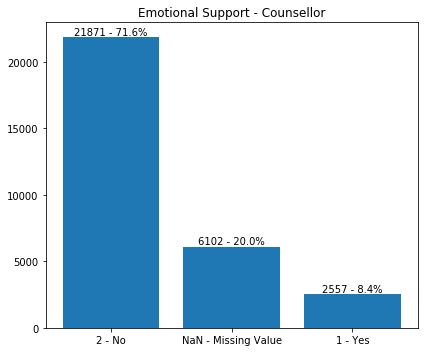

In [136]:
df_plot = df.emosupmhp.value_counts(dropna=False).rename_axis('unique_values').reset_index(name='counts')
emosupmhp_dict = {1 :'1 - Yes', 2 : '2 - No', np.nan: 'NaN - Missing Value'}
fig, ax = plt.subplots(figsize=(len(df_plot.index)*2, 5))
df_plot = df_plot.replace({"unique_values": emosupmhp_dict})
bar_plot = plt.bar(df_plot.unique_values, df_plot.counts)
plt.title('Emotional Support ‐ Counsellor')
autolabel(bar_plot)
plt.tight_layout()

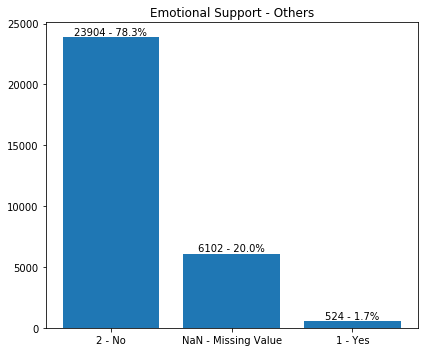

In [137]:
df_plot = df.emosupoth.value_counts(dropna=False).rename_axis('unique_values').reset_index(name='counts')
emosupoth_dict = {1 :'1 - Yes', 2 : '2 - No', np.nan: 'NaN - Missing Value'}
fig, ax = plt.subplots(figsize=(len(df_plot.index)*2, 5))
df_plot = df_plot.replace({"unique_values": emosupoth_dict})
bar_plot = plt.bar(df_plot.unique_values, df_plot.counts)
plt.title('Emotional Support ‐ Others')
autolabel(bar_plot)
plt.tight_layout()

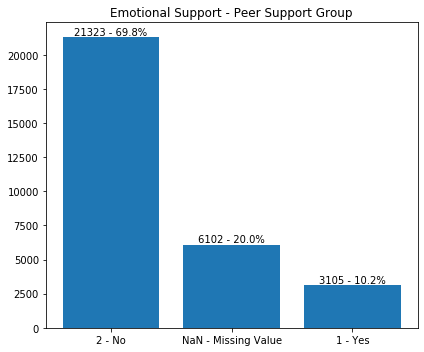

In [138]:
df_plot = df.emosuppeer.value_counts(dropna=False).rename_axis('unique_values').reset_index(name='counts')
emosuppeer_dict = {1 :'1 - Yes', 2 : '2 - No', np.nan: 'NaN - Missing Value'}
fig, ax = plt.subplots(figsize=(len(df_plot.index)*2, 5))
df_plot = df_plot.replace({"unique_values": emosuppeer_dict})
bar_plot = plt.bar(df_plot.unique_values, df_plot.counts)
plt.title('Emotional Support ‐ Peer Support Group')
autolabel(bar_plot)
plt.tight_layout()

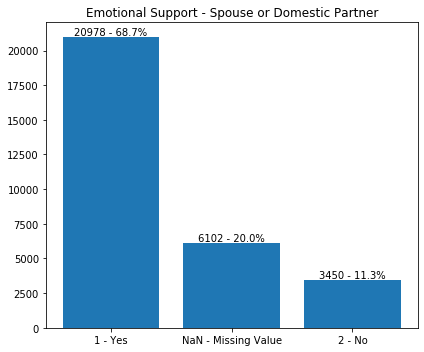

In [139]:
df_plot = df.emosupspo.value_counts(dropna=False).rename_axis('unique_values').reset_index(name='counts')
emosupspo_dict = {1 :'1 - Yes', 2 : '2 - No', np.nan: 'NaN - Missing Value'}
fig, ax = plt.subplots(figsize=(len(df_plot.index)*2, 5))
df_plot = df_plot.replace({"unique_values": emosupspo_dict})
bar_plot = plt.bar(df_plot.unique_values, df_plot.counts)
plt.title('Emotional Support ‐ Spouse or Domestic Partner')
autolabel(bar_plot)
plt.tight_layout()

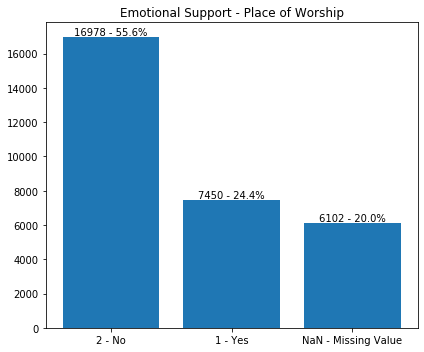

In [140]:
df_plot = df.emosupwor.value_counts(dropna=False).rename_axis('unique_values').reset_index(name='counts')
emosupwor_dict = {1 :'1 - Yes', 2 : '2 - No', np.nan: 'NaN - Missing Value'}
fig, ax = plt.subplots(figsize=(len(df_plot.index)*2, 5))
df_plot = df_plot.replace({"unique_values": emosupwor_dict})
bar_plot = plt.bar(df_plot.unique_values, df_plot.counts)
plt.title('Emotional Support ‐ Place of Worship')
autolabel(bar_plot)
plt.tight_layout()

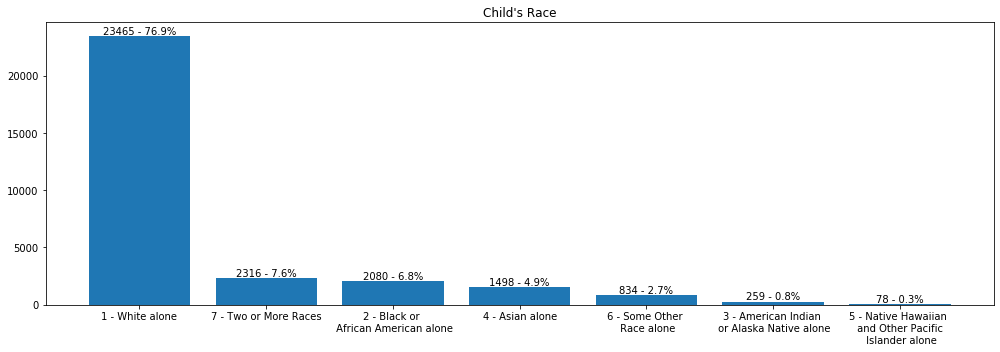

In [141]:
df_plot = df.sc_race_r.value_counts(dropna=False).rename_axis('unique_values').reset_index(name='counts')
sc_race_r_dict = {1 :'1 - White alone', 2 : '2 - Black or \n African American alone',3 :'3 - American Indian \n or Alaska Native alone', 4 : '4 - Asian alone', 5 : '5 - Native Hawaiian \n and Other Pacific \n Islander alone',6 : '6 - Some Other \n Race alone',7 :'7 - Two or More Races',np.nan: 'NaN - Missing Value'}
fig, ax = plt.subplots(figsize=(len(df_plot.index)*2, 5))
df_plot = df_plot.replace({"unique_values": sc_race_r_dict})
bar_plot = plt.bar(df_plot.unique_values, df_plot.counts)
plt.title("Child's Race")
autolabel(bar_plot)
plt.tight_layout()

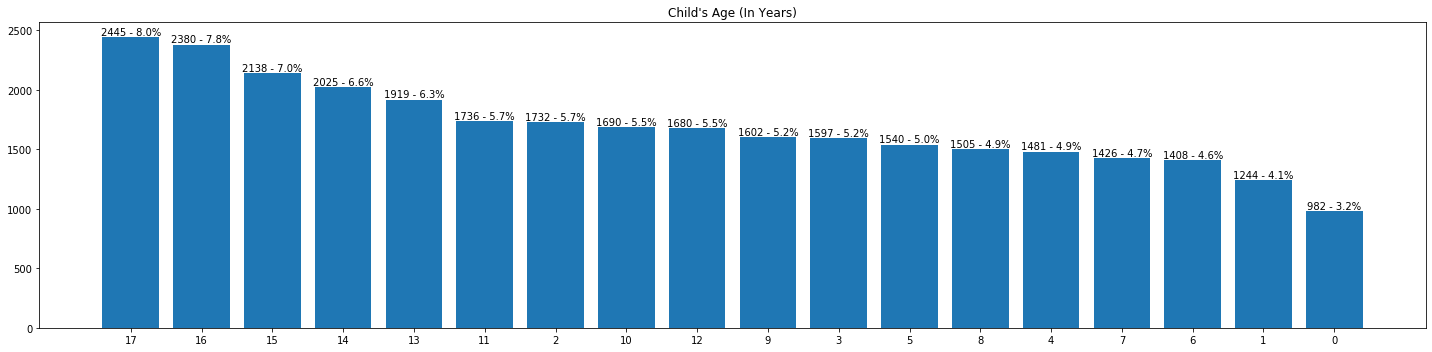

In [142]:
df_plot = df.sc_age_years.value_counts(dropna=False).rename_axis('unique_values').reset_index(name='counts')
df_plot['unique_values']= df_plot['unique_values'].astype(str)
fig, ax = plt.subplots(figsize=(20, 5))
bar_plot = plt.bar(df_plot.unique_values, df_plot.counts)
plt.title("Child's Age (In Years)")
autolabel(bar_plot)
plt.tight_layout()

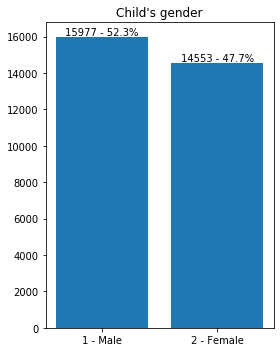

In [143]:
df_plot = df.sc_sex.value_counts(dropna=False).rename_axis('unique_values').reset_index(name='counts')
sc_sex_dict = {1 :'1 - Male', 2 : '2 - Female', np.nan: 'NaN - Missing Value'}
fig, ax = plt.subplots(figsize=(len(df_plot.index)*2, 5))
df_plot = df_plot.replace({"unique_values": sc_sex_dict})
bar_plot = plt.bar(df_plot.unique_values, df_plot.counts)
plt.title("Child's gender")
autolabel(bar_plot)
plt.tight_layout()

# Outcome Variables

### Summary

In [144]:
df[targets].describe()

,k2q31a,k2q32a,k2q33a
count,30199.000000,30404.000000,30427.000000
mean,1.901189,1.948625,1.893516
std,0.298413,0.220765,0.308462
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,2.000000,2.000000


In [145]:
df[targets].skew()
print("The value of Skewness is:")
print(df[targets].skew())
df[targets].kurtosis()
print("The value of kurtosis is:")
print(df[targets].kurtosis())

The value of Skewness is:
k2q31a   -2.688991
k2q32a   -4.064551
k2q33a   -2.551640
dtype: float64
The value of kurtosis is:
k2q31a     5.231018
k2q32a    14.521531
k2q33a     4.511162
dtype: float64


### Pie charts for outcome variables

In [146]:
df.k2q31a.value_counts(dropna=False)

2.0    27215
1.0     2984
NaN      331
Name: k2q31a, dtype: int64

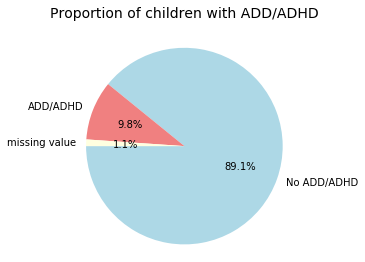

In [147]:
labels = ['No ADD/ADHD', 'ADD/ADHD','missing value']
sizes = df.k2q31a.value_counts(dropna=False)
colors = ["lightblue", "lightcoral",'lightyellow']
plt.pie(list(sizes), labels=labels, colors=colors, autopct="%1.1f%%", startangle=180)
plt.title("Proportion of children with ADD/ADHD", fontsize=14, pad=20)
plt.axis("equal")
plt.show()

In [148]:
df.k2q32a.value_counts(dropna=False)

2.0    28842
1.0     1562
NaN      126
Name: k2q32a, dtype: int64

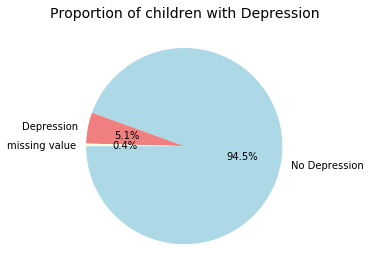

In [149]:
labels = ['No Depression', 'Depression','missing value']
sizes = df.k2q32a.value_counts(dropna=False)
colors = ["lightblue", "lightcoral", "lightyellow"]
plt.pie(list(sizes), labels=labels, colors=colors, autopct="%1.1f%%", startangle=180)
plt.title("Proportion of children with Depression", fontsize=14, pad=20)
plt.axis("equal")
plt.show()

In [150]:
df.k2q33a.value_counts(dropna=False)

2.0    27187
1.0     3240
NaN      103
Name: k2q33a, dtype: int64

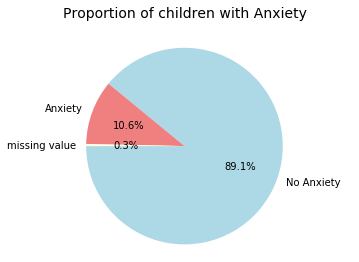

In [151]:
labels = ['No Anxiety', 'Anxiety','missing value']
sizes = df.k2q33a.value_counts(dropna=False)
colors = ["lightblue", "lightcoral", 'lightyellow']
plt.pie(list(sizes), labels=labels, colors=colors, autopct="%1.1f%%", startangle=180)
plt.title("Proportion of children with Anxiety", fontsize=14, pad=20)
plt.axis("equal")
plt.show()

#Data Transformation

##Data Cleaning

In [152]:
#only keep useful data
raw_training_data=df[features+targets]

#set the NaN a1_deplstat and 21_deplstat to 4
raw_training_data.fillna({'a1_deplstat':4,'a2_deplstat':4},inplace=True)

#remove the rows with NONE
raw_training_data.dropna(axis=0, how='any',inplace=True)
raw_training_data

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,ace1,ace3,ace4,ace5,ace6,ace7,ace8,ace9,ace10,a1_deplstat,a1_active,a1_grade,a1_menthealth,a1_physhealth,a1_relation,a2_deplstat,a2_active,a2_grade,a2_menthealth,a2_physhealth,a2_relation,foodsit,k8q35,emosupadv,emosupfam,emosuphcp,emosupmhp,emosupoth,emosuppeer,emosupspo,emosupwor,sc_race_r,sc_age_years,sc_sex,k2q31a,k2q32a,k2q33a
2,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,1.0,8,2.0,3.0,1.0,4.0,1.0,6.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1,16,1,2.0,2.0,2.0
3,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,1.0,8,1.0,1.0,1.0,4.0,1.0,7.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1,2,1,2.0,2.0,2.0
4,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,1.0,7,1.0,2.0,1.0,4.0,1.0,2.0,3.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1,17,1,1.0,2.0,1.0
5,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,1.0,6,2.0,2.0,1.0,4.0,1.0,7.0,3.0,3.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1,9,1,2.0,2.0,2.0
8,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,1.0,9,2.0,2.0,1.0,4.0,1.0,7.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1,1,1,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30525,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,4.0,1.0,2,3.0,2.0,1.0,4.0,1.0,5.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,1,10,1,2.0,2.0,1.0
30526,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,1.0,7,2.0,2.0,1.0,4.0,1.0,6.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1,2,1,2.0,2.0,2.0
30527,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,1.0,7,2.0,2.0,1.0,4.0,1.0,7.0,2.0,3.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1,8,1,2.0,2.0,2.0
30528,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,1.0,6,2.0,3.0,1.0,4.0,1.0,3.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1,7,2,2.0,2.0,2.0


##Data Transformation

In [153]:
#list categorical features
categorical_features = ['ace1','ace3','ace4','ace5','ace6','ace7','ace8','ace9','ace10','a1_deplstat','a1_active','a1_grade','a1_menthealth','a1_physhealth','a1_relation','a2_deplstat','a2_active','a2_grade','a2_menthealth','a2_physhealth','a2_relation','foodsit','k8q35','emosupadv','emosupfam','emosuphcp','emosupmhp','emosupoth','emosuppeer','emosupspo','emosupwor','sc_race_r','sc_sex']
target_features1=[targets[0]]
target_features2=[targets[1]]
target_features3=[targets[2]]

#make the data into categorical
#transformed_data=pd.get_dummies(raw_training_data[features],columns=categorical_features)
transformed_data=raw_training_data[features]
#transformed_target1=pd.get_dummies(raw_training_data[target_features1],columns=[targets[0]])
transformed_target1=raw_training_data[target_features1]
transformed_target2=raw_training_data[target_features2]
transformed_target3=raw_training_data[target_features3]
transformed_target1

,k2q31a
2,2.0
3,2.0
4,1.0
5,2.0
8,2.0
...,...
30525,2.0
30526,2.0
30527,2.0
30528,2.0


##Split Data

In [0]:
from sklearn.model_selection import train_test_split


In [0]:
#split data into train_set and test_set
data_train_set1,data_test_set1,target_train_set1,target_test_set1=train_test_split(transformed_data,transformed_target1,test_size = 0.3,random_state = 6,stratify = transformed_target1)
data_train_set2,data_test_set2,target_train_set2,target_test_set2=train_test_split(transformed_data,transformed_target2,test_size = 0.3,random_state = 6,stratify = transformed_target2)
data_train_set3,data_test_set3,target_train_set3,target_test_set3=train_test_split(transformed_data,transformed_target3,test_size = 0.3,random_state = 6,stratify = transformed_target3)

#Training the Classifier

##Import Libraries and Ignore Warnings

In [0]:
#remove warning to see clear result
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.exceptions import UndefinedMetricWarning
from sklearn.exceptions import DataConversionWarning


warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
warnings.filterwarnings(action='ignore', category=UndefinedMetricWarning)
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action="ignore", category=FutureWarning)

In [0]:
from time import time

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

##Evaluation Fcuntion

In [0]:
def classifier_train(clf,train,test,target_train,target_test):

  print("Classifier: {} [sample size: {}]".format(clf.__class__.__name__, len(train)))

  #training the classifier
  start = time()
  clf.fit(train, target_train)
  end = time()
  print("Time for training: {:.4f} sec".format(end - start))

  #test the classifier
  start = time()
  pred1 = clf.predict(train)
  end = time()
  print("Time for prediction for training set: {:.4f} sec".format(end - start))

  start = time()
  pred2 = clf.predict(test)
  end = time()
  print("Time for prediction for test set: {:.4f} sec".format(end - start))

  
  #show accuracy score
  acc1=accuracy_score(target_train,pred1)
  print("Accuracy for training set: {:.4f}".format(acc1))
  acc2=accuracy_score(target_test,pred2)
  print("Accuracy for test set: {:.4f}".format(acc2))

  #show f1 score
  f11=f1_score(target_train, pred1, pos_label=1, average="weighted")
  print("F1 score for training set: {:.4f} ".format(f11))
  f12=f1_score(target_test, pred2, pos_label=1, average="weighted")
  print("F1 score for test set: {:.4f} ".format(f12))

  return clf


In [159]:
lr =LogisticRegression(solver='lbfgs',multi_class = 'multinomial')
clf_trained1=classifier_train(lr,data_train_set1,data_test_set1,target_train_set1,target_test_set1)
clf_trained2=classifier_train(lr,data_train_set2,data_test_set2,target_train_set2,target_test_set2)
clf_trained3=classifier_train(lr,data_train_set3,data_test_set3,target_train_set3,target_test_set3)

Classifier: LogisticRegression [sample size: 13757]
Time for training: 0.7250 sec
Time for prediction for training set: 0.0034 sec
Time for prediction for test set: 0.0021 sec
Accuracy for training set: 0.9116
Accuracy for test set: 0.9074
F1 score for training set: 0.8802 
F1 score for test set: 0.8741 
Classifier: LogisticRegression [sample size: 13757]
Time for training: 0.7179 sec
Time for prediction for training set: 0.0033 sec
Time for prediction for test set: 0.0020 sec
Accuracy for training set: 0.9573
Accuracy for test set: 0.9556
F1 score for training set: 0.9455 
F1 score for test set: 0.9432 
Classifier: LogisticRegression [sample size: 13757]
Time for training: 0.7040 sec
Time for prediction for training set: 0.0033 sec
Time for prediction for test set: 0.0020 sec
Accuracy for training set: 0.9062
Accuracy for test set: 0.9088
F1 score for training set: 0.8783 
F1 score for test set: 0.8817 


##Predict Result

In [0]:
def classifier_predict(clf_trained,train,test,target_train,target_test):

  #train the classifier
  #clf.fit(train,target_train)

  #prediction result
  predicted_train = clf_trained.predict(train) 
  predicted_test = clf_trained.predict(test)

  #generate probabilities
  probs_train = clf_trained.predict_proba(train) 
  probs_test = clf_trained.predict_proba(test)

  return predicted_train,predicted_test,probs_train,probs_test

In [0]:
predicted_train1,predicted_test1,probs_train1,probs_test1=classifier_predict (clf_trained1,data_train_set1,data_test_set1,target_train_set1,target_test_set1)
predicted_train2,predicted_test2,probs_train2,probs_test2=classifier_predict (clf_trained2,data_train_set2,data_test_set2,target_train_set2,target_test_set2)
predicted_train3,predicted_test3,probs_train3,probs_test3=classifier_predict (clf_trained3,data_train_set3,data_test_set3,target_train_set3,target_test_set3)

##Cross-Validation

In [0]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [0]:
def cross_validation(clf,train,target_train,test,target_test,predicted_train,predicted_test):

  #cross-validation with KFold, split data into 10 pieces
  kfold_ada = model_selection.KFold(n_splits=10, random_state=10)

  #Confusion metrics & Classification reports
  confusion_matrix_train = metrics.confusion_matrix(target_train, predicted_train) 
  confusion_matrix_test = metrics.confusion_matrix(target_test, predicted_test) 
  classification_report_train = metrics.classification_report(target_train, predicted_train) 
  classification_report_test = metrics.classification_report(target_test, predicted_test)
  print("Confusion matric train:")
  print(confusion_matrix_train)
  print("Confusion matric test:")
  print(confusion_matrix_test)
  print("Classification report train:")
  print(classification_report_train)
  print("Classification report test:")
  print(classification_report_test)

  #cross-validation score
  results = cross_val_score(clf,test,target_test,cv=kfold_ada)
  print("Cross-validation score:{}".format(results.mean()))

  return None

In [164]:
cross_validation(lr,data_train_set1,target_train_set1,data_test_set1,target_test_set1,predicted_train1,predicted_test1)
cross_validation(lr,data_train_set2,target_train_set2,data_test_set2,target_test_set2,predicted_train2,predicted_test2)
cross_validation(lr,data_train_set3,target_train_set3,data_test_set3,target_test_set3,predicted_train3,predicted_test3)

Confusion matric train:
[[  108  1129]
 [  199 12321]]
Confusion matric test:
[[  43  487]
 [  79 5287]]
Classification report train:
              precision    recall  f1-score   support

         1.0       0.35      0.09      0.14      1237
         2.0       0.92      0.98      0.95     12520

    accuracy                           0.90     13757
   macro avg       0.63      0.54      0.54     13757
weighted avg       0.87      0.90      0.88     13757

Classification report test:
              precision    recall  f1-score   support

         1.0       0.35      0.08      0.13       530
         2.0       0.92      0.99      0.95      5366

    accuracy                           0.90      5896
   macro avg       0.63      0.53      0.54      5896
weighted avg       0.87      0.90      0.88      5896

Cross-validation score:0.9073928807804093
Confusion matric train:
[[  138   459]
 [  161 12999]]
Confusion matric test:
[[  56  200]
 [  74 5566]]
Classification report train:
        

##AUC & ROC

In [0]:
from sklearn.metrics import roc_curve,auc,roc_auc_score

In [0]:
def show_auc_roc(target_train,predicted_train):

  #Calculate false positive rate and true positive rate and AUC score #Training Set
  false_positive_rate, true_positive_rate, thresholds = roc_curve(target_train, predicted_train,pos_label=2) 
  #print(roc_auc_score(target_train, predicted_train))
  roc_auc = auc(false_positive_rate, true_positive_rate)

  ##Plot the FPR vs. TPR 
  plt.title('Receiver Operating Characteristic (LOGISTIC TRAIN)') 
  plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc) 
  plt.legend(loc='lower right') 
  plt.plot([0,1],[0,1],'r--') 
  plt.xlim([-0.1,1.2]) 
  plt.ylim([-0.1,1.2]) 
  plt.ylabel('True Positive Rate') 
  plt.xlabel('False Positive Rate') 
  plt.show()

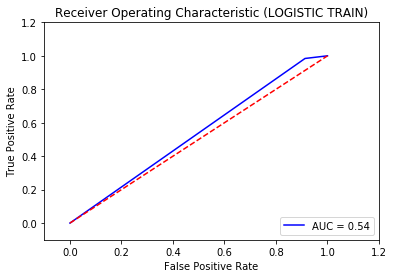

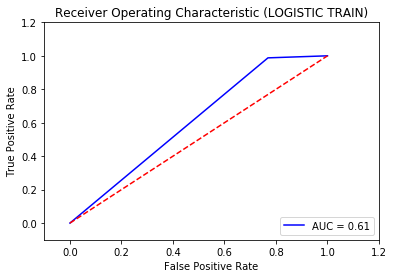

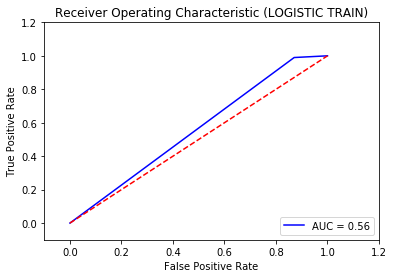

In [167]:
show_auc_roc(target_train_set1,predicted_train1)
show_auc_roc(target_train_set2,predicted_train2)
show_auc_roc(target_train_set3,predicted_train3)